<a href="https://colab.research.google.com/github/s-reaungamornrat/artificial_intelligence/blob/master/torchvision_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is page following [torch_vision_tutorial.ipynb](https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/4a542c9f39bedbfe7de5061767181d36/torchvision_tutorial.ipynb#scrollTo=kTVBxg9mR9FI) from pytorch. We will also want to explore [multiobject-tracking](https://colab.research.google.com/github/mlvlab/COSE474/blob/master/3_Object_Detection_and_MOT_tutorial.ipynb)

In [ ]:
%matplotlib inline

In [ ]:
# check pytorch version
!pip list

Package                               Version
------------------------------------- -------------------
absl-py                               1.4.0
accelerate                            1.9.0
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.12.14
aiosignal                             1.4.0
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.2
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.9.0
anywidget                             0.9.18
argon2-cffi                           25.1.0
argon2-cffi-bindings                  21.2.0
array_record                          0.7.2
arviz                                 0.22.0
astropy                               7.1.0
astropy

In [ ]:
!wget https://www.cis.upenn.edu/~jshi/ped_html/PennFudanPed.zip -P data
!cd data && unzip PennFudanPed.zip

--2025-08-02 20:16:33--  https://www.cis.upenn.edu/~jshi/ped_html/PennFudanPed.zip
Resolving www.cis.upenn.edu (www.cis.upenn.edu)... 158.130.69.163, 2607:f470:8:64:5ea5::d
Connecting to www.cis.upenn.edu (www.cis.upenn.edu)|158.130.69.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53723336 (51M) [application/zip]
Saving to: ‘data/PennFudanPed.zip’

PennFudanPed.zip    100%[===================>]  51.23M  29.1MB/s    in 1.8s    

2025-08-02 20:16:35 (29.1 MB/s) - ‘data/PennFudanPed.zip’ saved [53723336/53723336]

Archive:  PennFudanPed.zip
   creating: PennFudanPed/
  inflating: PennFudanPed/added-object-list.txt  
   creating: PennFudanPed/Annotation/
  inflating: PennFudanPed/Annotation/FudanPed00001.txt  
  inflating: PennFudanPed/Annotation/FudanPed00002.txt  
  inflating: PennFudanPed/Annotation/FudanPed00003.txt  
  inflating: PennFudanPed/Annotation/FudanPed00004.txt  
  inflating: PennFudanPed/Annotation/FudanPed00005.txt  
  inflating: PennFudanPe

In [ ]:
!ls data/PennFudanPed/

added-object-list.txt  Annotation  PedMasks  PNGImages	readme.txt


In [ ]:
with open('data/PennFudanPed/readme.txt', 'r') as f:  print(f.read())

added-object-list.txt  Annotation  PedMasks  PNGImages	readme.txt
1. Directory structure:

PNGImages:   All the database images in PNG format.

PedMasks :   Mask for each image, also in PNG format. Pixels are labeled 0 for background, or > 0 corresponding
to a particular pedestrian ID.

Annotation:  Annotation information for each image.  Each file is in the following format (take FudanPed00001.txt as an example):

# Compatible with PASCAL Annotation Version 1.00
Image filename : "PennFudanPed/PNGImages/FudanPed00001.png"
Image size (X x Y x C) : 559 x 536 x 3
Database : "The Penn-Fudan-Pedestrian Database"
Objects with ground truth : 2 { "PASpersonWalking" "PASpersonWalking" }
# Note there may be some objects not included in the ground truth list for they are severe-occluded
# or have very small size.
# Top left pixel co-ordinates : (1, 1)
# Details for pedestrian 1 ("PASpersonWalking")
Original label for object 1 "PASpersonWalking" : "PennFudanPed"
Bounding box for object 1 "PASperso

In [ ]:
!ls data/PennFudanPed/Annotation

FudanPed00001.txt  FudanPed00044.txt  PennPed00013.txt	PennPed00056.txt
FudanPed00002.txt  FudanPed00045.txt  PennPed00014.txt	PennPed00057.txt
FudanPed00003.txt  FudanPed00046.txt  PennPed00015.txt	PennPed00058.txt
FudanPed00004.txt  FudanPed00047.txt  PennPed00016.txt	PennPed00059.txt
FudanPed00005.txt  FudanPed00048.txt  PennPed00017.txt	PennPed00060.txt
FudanPed00006.txt  FudanPed00049.txt  PennPed00018.txt	PennPed00061.txt
FudanPed00007.txt  FudanPed00050.txt  PennPed00019.txt	PennPed00062.txt
FudanPed00008.txt  FudanPed00051.txt  PennPed00020.txt	PennPed00063.txt
FudanPed00009.txt  FudanPed00052.txt  PennPed00021.txt	PennPed00064.txt
FudanPed00010.txt  FudanPed00053.txt  PennPed00022.txt	PennPed00065.txt
FudanPed00011.txt  FudanPed00054.txt  PennPed00023.txt	PennPed00066.txt
FudanPed00012.txt  FudanPed00055.txt  PennPed00024.txt	PennPed00067.txt
FudanPed00013.txt  FudanPed00056.txt  PennPed00025.txt	PennPed00068.txt
FudanPed00014.txt  FudanPed00057.txt  PennPed00026.txt	PennPed00

In [102]:
import re
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import cycle

def read_annotation(annotation_fpath):
  '''
  Read annotation file of PennFudanPed dataset
  Input:
    annotation_fpath (str): path to annotation
  Output:
    annotation (dict): dict of sequences of object numbers, labels, and bounding boxes, as {obj_num:[], label:[], bbox:[] }
  '''
  assert os.path.isfile(annotation_fpath), f'{annotation_fpath} does not exist'

  with open(annotation_fpath, 'r') as f:  annotation_txt=f.read().split('\n')

  # read annotation
  annotation={'obj_num':[], 'label':[], 'bbox':[] }
  for line in annotation_txt:
    if re.findall('^Original label', line):
      idx=np.nonzero([word.isnumeric() for word in line.split()])[0].item()
      obj_n=int(line.split()[idx])
      label=line.split()[idx+1].strip('"')
    elif re.findall('^Bounding box', line):
      bbox=[[int(x.strip(' ( ) ')) for x in term.split(',')] for term in line.split(':')[-1].split('-')]
      annotation['obj_num'].append(obj_n)
      annotation['label'].append(label)
      annotation['bbox'].append(bbox)
  return annotation

def display_image_overlay(image, mask, annotation):
  '''
  Display each image and mask overlay by annotation
  Input:
    image (tensor): CxHxW or CxYxX uint8
    mask (tensor): 1xHxW or 1xYxX uint8
    annotation (dict): dict containing sequences of bounding box (under key bbox) and label (under key label)
  '''
  assert all(key in annotation for key in ['bbox', 'label'])

  # bounding box colors
  colours = cycle(['r', 'g', 'b', 'm', 'c'])

  # text format for label overlaid on images
  font = {'family': 'serif',
          'color':  'cyan',
          'weight': 'normal',
          'size': 10,
          }

  fig, axs = plt.subplots(1, 2, figsize=(16, 8))
  axs[0].imshow(image.permute(1,2,0)) # HxWxC / YxXxC
  for i, (bbox, color) in enumerate(zip(annotation['bbox'], colours)):
    width,height=[e-s for e, s in zip(bbox[-1], bbox[0])]
    # Create a Rectangle patch
    rect = patches.Rectangle([x-1 for x in bbox[0]], width,height, linewidth=2,edgecolor=color, facecolor='none')
    # Add the patch to the Axes
    axs[0].add_patch(rect)
    axs[0].text(bbox[0][0],bbox[-1][1], annotation['label'][i], fontdict=font)

  axs[1].imshow(mask.permute(1,2,0)) # HxWxC / YxXxC
  for i, (bbox, color) in enumerate(zip(annotation['bbox'], colours)):
    width,height=[e-s for e, s in zip(bbox[-1], bbox[0])]
    # Create a Rectangle patch
    rect = patches.Rectangle([x-1 for x in bbox[0]], width,height, linewidth=2,edgecolor=color, facecolor='none')
    # Add the patch to the Axes
    axs[1].add_patch(rect)
    axs[1].text(bbox[0][0],bbox[-1][1], annotation['label'][i], fontdict=font)

image  <class 'torch.Tensor'> torch.Size([3, 438, 567]) torch.uint8
mask  <class 'torch.Tensor'> torch.Size([1, 438, 567]) torch.uint8
{'obj_num': [1, 2, 3, 4], 'label': ['PASpersonWalking', 'PASpersonWalking', 'PASpersonStanding', 'PASpersonWalking'], 'bbox': [[[178, 123], [271, 410]], [[299, 114], [370, 335]], [[446, 104], [507, 315]], [[521, 119], [565, 258]]]}


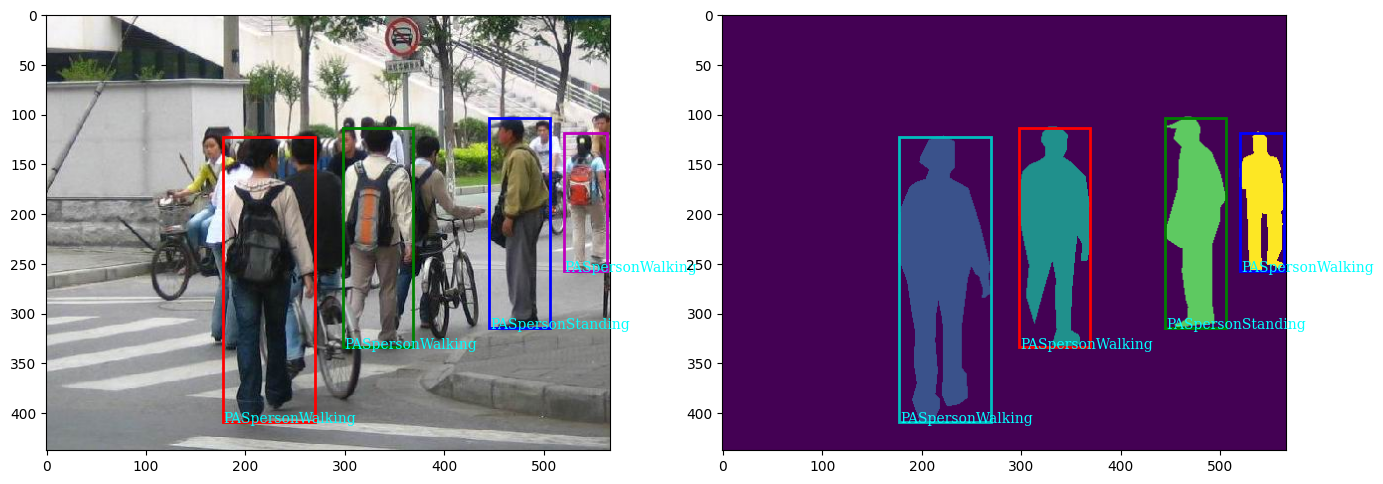

In [104]:
from torchvision.io import read_image


image=read_image('data/PennFudanPed/PNGImages/FudanPed00046.png') # CxHxW -> CxYxX
mask=read_image('data/PennFudanPed/PedMasks/FudanPed00046_mask.png') # CxHxW -> CxYxX
print('image ', type(image), image.shape, image.dtype)
print('mask ', type(mask), mask.shape, mask.dtype)

annotation=read_annotation('data/PennFudanPed/Annotation/FudanPed00046.txt')
print(annotation)
display_image_overlay(image=image, mask=mask, annotation=annotation)

In [ ]:
import os
import torch

from torchvision.io import read_image
from torchvision.ops.boxes import masks_to_boxes
from torchvision import tv_tensors
from torchvision.transforms.v2 import functional as F

In [90]:
root='data/PennFudanPed'
annotation_dirname='Annotation'
image_dirname='PNGImages'
mask_dirname='PedMasks'

image_fnames=np.asarray(sorted(s.encode('utf-8') for s in os.listdir(os.path.join(root, image_dirname)))) # decode s.decode('utf-8')
mask_fnames=np.asarray(sorted(s.encode('utf-8') for s in os.listdir(os.path.join(root, mask_dirname)))) # decode s.decode('utf-8')
bbox_fnames=np.asarray(sorted(s.encode('utf-8') for s in os.listdir(os.path.join(root, annotation_dirname)))) # decode s.decode('utf-8')
print(len(image_fnames), image_fnames[0])
print(len(mask_fnames), mask_fnames[0])
print(len(bbox_fnames), bbox_fnames[0])
# make sure that files are ordered consistently
for im, msk, bb in zip(image_fnames, mask_fnames, bbox_fnames):
  im=im.decode('utf-8')
  msk=msk.decode('utf-8')
  bb=bb.decode('utf-8')
  assert all(os.path.splitext(im)[0]==os.path.splitext(x)[0].replace('_mask', '') for x in [bb, msk])

170 b'FudanPed00001.png'
170 b'FudanPed00001_mask.png'
170 b'FudanPed00001.txt'


In [91]:
class PennFudanDataset(torch.utils.data.Dataset):

  def __init__(self, root, image_dirname, mask_dirname, annotation_dirname, transforms):

    self.transforms=transforms
    self.image_dirpath=os.path.join(root, image_dirname).encode('utf-8')
    self.mask_dirpath=os.path.join(root, mask_dirname).encode('utf-8')
    self.annotation_dirpath=os.path.join(root, annotation_dirname).encode('utf-8')


    self.image_fnames=np.asarray(sorted(s.encode('utf-8') for s in os.listdir(self.image_dirpath.decode('utf-8')))) # decode s.decode('utf-8')
    self.mask_fnames=np.asarray(sorted(s.encode('utf-8') for s in os.listdir(self.mask_dirpath.decode('utf-8')))) # decode s.decode('utf-8')
    self.bbox_fnames=np.asarray(sorted(s.encode('utf-8') for s in os.listdir(self.annotation_dirpath.decode('utf-8')))) # decode s.decode('utf-8')

    # make sure that files are ordered consistently
    for im, msk, bb in zip(self.image_fnames, self.mask_fnames, self.bbox_fnames):
      im=im.decode('utf-8')
      msk=msk.decode('utf-8')
      bb=bb.decode('utf-8')
      assert all(os.path.splitext(im)[0]==os.path.splitext(x)[0].replace('_mask', '') for x in [bb, msk])


dataset=PennFudanDataset(root='data/PennFudanPed', image_dirname='PNGImages', mask_dirname='PedMasks', annotation_dirname='Annotation', transforms=None)
dataset

170 b'FudanPed00001.png'
170 b'FudanPed00001_mask.png'
170 b'FudanPed00001.txt'


image_fpath  data/PennFudanPed/PNGImages/PennPed00096.png
mask_fpath  data/PennFudanPed/PedMasks/PennPed00096_mask.png
bbox_fpath  data/PennFudanPed/Annotation/PennPed00096.txt
{'obj_num': [1, 2], 'label': ['PASpersonWalking', 'PASpersonWalking'], 'bbox': [[[6, 38], [103, 324]], [[101, 26], [206, 323]]]}


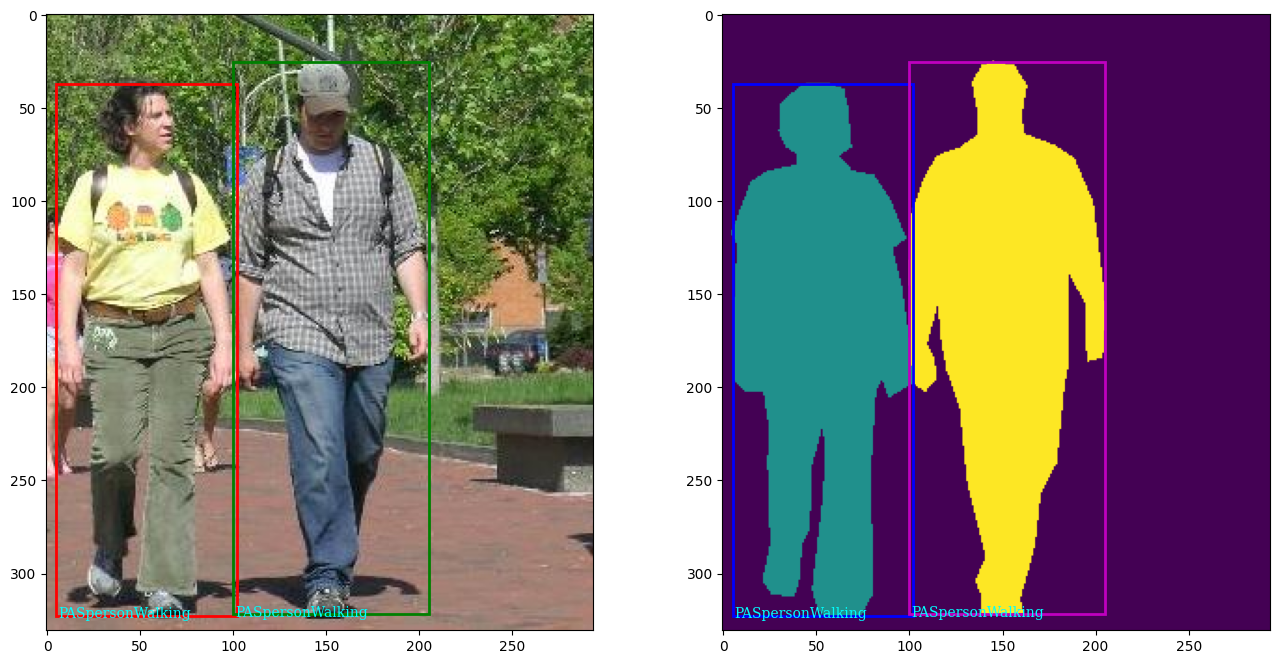

In [105]:
idx=169
idx=idx%len(dataset.image_fnames)

image_fpath=os.path.join(dataset.image_dirpath.decode('utf-8'), dataset.image_fnames[idx].decode('utf-8'))
mask_fpath=os.path.join(dataset.mask_dirpath.decode('utf-8'), dataset.mask_fnames[idx].decode('utf-8'))
bbox_fpath=os.path.join(dataset.annotation_dirpath.decode('utf-8'), dataset.bbox_fnames[idx].decode('utf-8'))
print('image_fpath ', image_fpath)
print('mask_fpath ', mask_fpath)
print('bbox_fpath ', bbox_fpath)


annotation=read_annotation(bbox_fpath)
print(annotation)
image=read_image(image_fpath)
mask=read_image(mask_fpath)
display_image_overlay(image=image, mask=mask, annotation=annotation)

In [111]:
# instances are encoded with different colors
obj_ids=torch.unique(mask)
# first id is the background, so remove it
obj_ids=obj_ids[1:]
num_objs=len(obj_ids)
print(obj_ids, num_objs)

# split the color-encoded mask into a set of binary masks
masks=(mask==obj_ids[:,None,None]).to(dtype=torch.uint8) # LxHxW or LxYxX where L is the number of objects
print(masks.shape)
plt.figure(figsize=(16,8))
plt.subplot(1)

tensor([1, 2], dtype=torch.uint8) 2
torch.Size([2, 331, 294])


In [109]:
obj_ids

tensor([1, 2], dtype=torch.uint8)

In [ ]:
       # instances are encoded as different colors
        obj_ids = torch.unique(mask)
        # first id is the background, so remove it
        obj_ids = obj_ids[1:]
        num_objs = len(obj_ids)

        # split the color-encoded mask into a set
        # of binary masks
        masks = (mask == obj_ids[:, None, None]).to(dtype=torch.uint8)

        # get bounding box coordinates for each mask
        boxes = masks_to_boxes(masks)

        # there is only one class
        labels = torch.ones((num_objs,), dtype=torch.int64)

        image_id = idx
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        # suppose all instances are not crowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        # Wrap sample and targets into torchvision tv_tensors:
        img = tv_tensors.Image(img)

        target = {}
        target["boxes"] = tv_tensors.BoundingBoxes(boxes, format="XYXY", canvas_size=F.get_size(img))
        target["masks"] = tv_tensors.Mask(masks)
        target["labels"] = labels
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd

        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target

    def __len__(self):
        return len(self.imgs)